In [50]:
import pandas as pd
import numpy as np

In [51]:
from pandas.compat import StringIO
import matplotlib.pyplot as plt

In [108]:
data = pd.read_csv('500_60_105K.csv',delimiter = ',')
xStr = 'Raman Shift (cm-1)'
yStr = 'Mod + Offset (a.u.)'
df1 = data[[yStr,xStr]]
# Read the data for 100Oe with sweep of 60K to 105K 

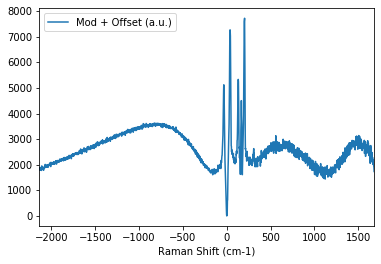

In [109]:
df2 = df1.head(2000)
df2.plot(xStr,yStr)

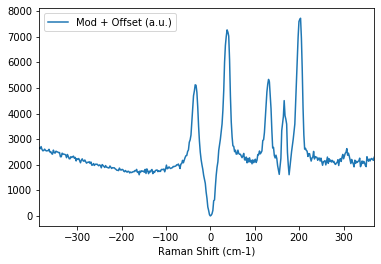

In [110]:
df3 = df2.iloc[800:1200,:]
df3.plot(xStr,yStr)

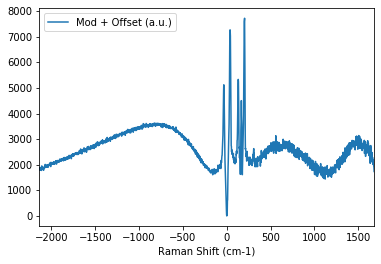

In [111]:
spectralist = []
for i in range(0,45):
    dftmp = df1.iloc[(i*2000):((i+1)*2000),:]
    dftmp1 =  dftmp.iloc[:,:]
    spectralist.append(dftmp1)
    
spectralist[0].plot(xStr,yStr)
# Verification of each spectra represent a single spectrum 
plt.show()

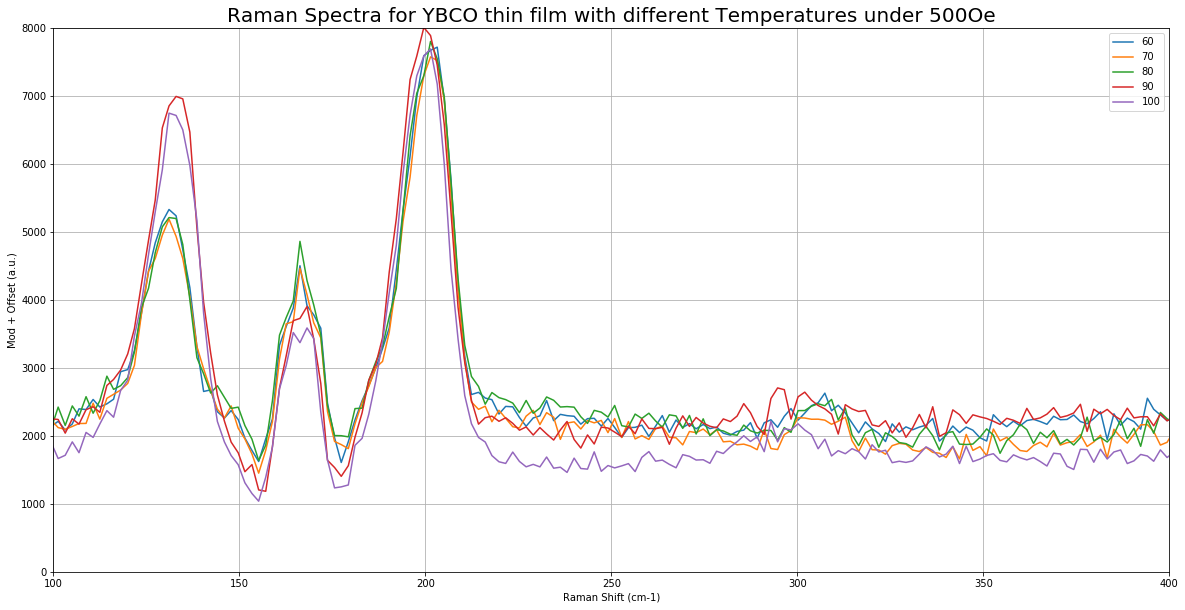

In [113]:

fig,ax = plt.subplots()
fig.set_size_inches(20,10)

# offset is optional and could be removed
offset = 0
for temp in [0,10,20,30,40]:
    ax.plot(spectralist[temp][xStr],spectralist[temp][yStr]+temp*offset,label=temp+60)
    ax.set_xlim(100,400)
    ax.set_ylim(0,8000)
    ax.grid(True)

plt.xlabel(xStr)
plt.ylabel(yStr)
plt.title('Raman Spectra for YBCO thin film with different Temperatures under 500Oe',fontsize = 20)
plt.legend()
plt.show()

#the change of spectrum is minimal with variation of temperature
#I highly doubt this is not the side for YBCO

In [57]:
# Then we hope to take a look at the influence of magnetic field data
data1 = pd.read_csv('0_60_105K.csv',delimiter = ',')
xStr = 'Raman Shift (cm-1)'
yStr = 'Mod + Offset (a.u.)'
df1 = data1[[yStr,xStr]]
# Read the data for 0Oe with sweep of 60K to 105K 

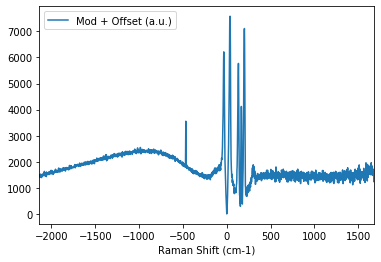

In [58]:
df2 = df1.head(2000)
df2.plot(xStr,yStr)

In [117]:
# Clean previous data first, prefered manipulation
# Read the data for 0Oe, 100Oe, 500Oe and 3T with sweep of 60K to 105K 
# P stands for pellet
Pdata0 = pd.read_csv('0_60_105K.csv',delimiter = ',')
Pdata100 =  pd.read_csv('100_60_105K.csv',delimiter = ',')
Pdata500 =  pd.read_csv('500_60_105K.csv',delimiter = ',')
Pdata3T =  pd.read_csv('3T_60_105K.csv',delimiter = ',')
xStr = 'Raman Shift (cm-1)'
yStr = 'Mod + Offset (a.u.)'
spec0 = Pdata0[[yStr,xStr]]
spec100 = Pdata100[[yStr,xStr]]
spec500 = Pdata500[[yStr,xStr]]
spec3T = Pdata3T[[yStr,xStr]]

len(spec3T)

92000

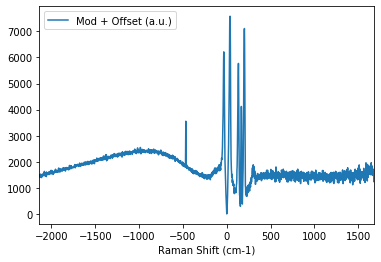

In [118]:
# make a spectrum list for all these data
# spectra 0~45: spec0
# spectra 46~91: spec100
# spectra 92~137: spec500
# spectra 138~183: spec3T
Pspectralist =[]
for i in range(0,46):
    tmp = spec0.iloc[(i*2000):((i+1)*2000),:]
    Pspectralist.append(tmp)
for i in range(0,46):
    tmp = spec100.iloc[(i*2000):((i+1)*2000),:]
    Pspectralist.append(tmp)
for i in range(0,46):
    tmp = spec500.iloc[(i*2000):((i+1)*2000),:]
    Pspectralist.append(tmp)
for i in range(0,46):
    tmp = spec3T.iloc[(i*2000):((i+1)*2000),:]
    Pspectralist.append(tmp)

len(Pspectralist)
Pspectralist[0].plot(xStr,yStr)

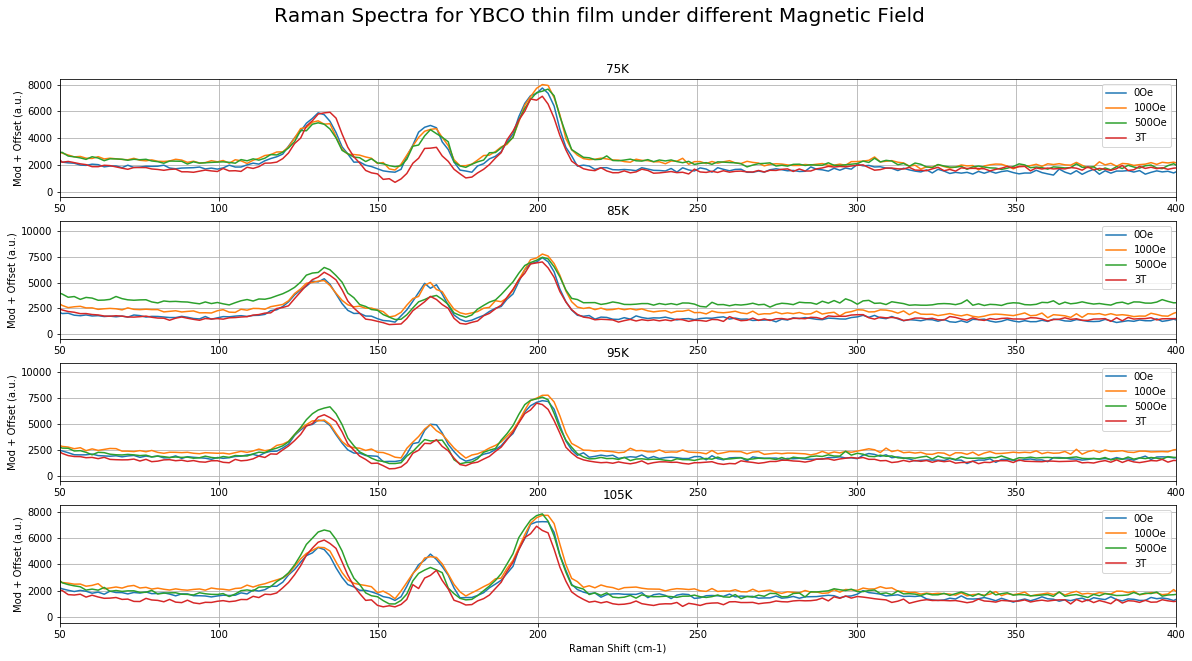

In [124]:
fig,axs = plt.subplots(4)
fig.set_size_inches(20,10)
Plegend = ['0Oe','100Oe','500Oe','3T']
PT = 25
xlow = 50
xhigh = 400

for t in [PT,PT+46,PT+92,PT+138]:
    axs[0].plot(Pspectralist[t-10][xStr],Pspectralist[t-10][yStr],label=Plegend[int(t/46)])
    axs[0].set_title('75K')
    axs[0].set_xlim(xlow,xhigh)
    axs[0].legend()
    axs[0].grid(True)
    axs[1].plot(Pspectralist[t][xStr],Pspectralist[t][yStr],label=Plegend[int(t/46)])
    axs[1].legend()
    axs[1].set_title('85K')
    axs[1].set_xlim(xlow,xhigh)
    axs[1].grid(True)
    axs[2].plot(Pspectralist[t+10][xStr],Pspectralist[t+10][yStr],label=Plegend[int(t/46)])
    axs[2].legend()
    axs[2].set_title('95K')
    axs[2].set_xlim(xlow,xhigh)
    axs[2].grid(True)
    axs[3].plot(Pspectralist[t+20][xStr],Pspectralist[t+20][yStr],label=Plegend[int(t/46)])
    axs[3].legend()
    axs[3].set_title('105K')
    axs[3].set_xlim(xlow,xhigh)    
    axs[3].grid(True)


for ax in axs.flat:
    ax.set(ylabel = yStr)

axs[3].set(xlabel=xStr)
    
fig.suptitle('Raman Spectra for YBCO thin film under different Magnetic Field', fontsize = 20)
plt.show()

# Reference code: https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html

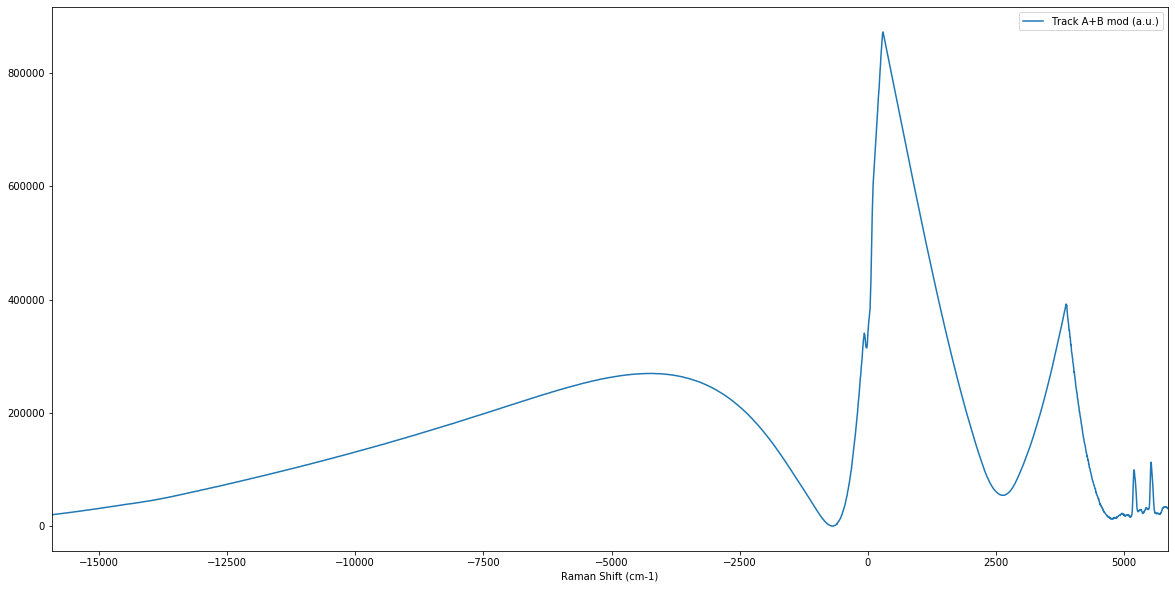

In [65]:
# Data of LaAlO, S stands for substrate
# Then we hope to take a look at the influence of magnetic field data
Sdata = pd.read_csv('LaAlO.csv',delimiter = ',')
SStr = 'Track A+B mod (a.u.)'
SStr1 = 'Track A+B mod + off (a.u.)'
Sspectra = Sdata[[SStr,xStr]]
Sspectra.plot(xStr,SStr, figsize=(20,10))